# GATHER DATA 

In [387]:
import pandas as pd
import numpy as np
import requests
import os
import json
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# read twitter-archive-enhanced csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#use requests library to download image-predictions tsv file from internet
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, 
                           url.split('/')[-1]), mode= 'wb') as file:
        file.write(response.content)

In [4]:
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
#read image-predictions tsv file 
image_pred= pd.read_csv('image_predictions/image-predictions.tsv', sep= '\t')

In [6]:
# api for twitter 
import tweepy

consumer_key = 's8XZQ7Esd0upK5WqqgV3yyNrY'
consumer_secret = 'eiJKUuUOJUxYhjJUWYJavXTWboDmnO5SXjF9Jz1zH25GXJqxwA'
access_token = '1015528701633544192-Io0LHWuWOQoylxePBVVJFeHIsrbqdk'
access_secret = 'JNSpMhhjjReVux5pJeIr8bg6u3VbE6tKAkzuz72p9m490'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify= True)

In [7]:
#append twitter status to file named tweet_json.txt
with open('tweet_json.txt', 'a') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id,tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

In [8]:
#append information of above file in list
tweets_data = []
for line in open('tweet_json.txt', 'r'):
    try:
        tweets_data.append(json.loads(line))
    except:
        continue

In [9]:
len(tweets_data)

2330

In [10]:
#create new dataframe
tweet_vars= pd.DataFrame()

#make columns for dataframe by extracting data from tweets_data
tweet_vars['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_vars['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweet_vars['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))

# ASSESS DATA 

### Quality issues

#### twitter_archive table 
- display full content of text column
- there are 181 rows which are retweets(we only need original data)
- Erroneous datatypes (timestamp, tweet_id, rating_numerator, rating_denominator)
- rating_denominator values are not all 10 (some because the text column contains more than one #/# formats, Tweet_id 810984652412424192 doesn't contain a rating (24/7 is not a rating!))
- wrong dog names - a, an, the, this, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such
- simplify source column (such as twitter for iphone, twitter web client etc)                                           
#### image_pred table
- '-' in predictions name
- first letter of dog predictions is small

### Tidiness issues

- dog stages columns should be condensed to one column.
- drop columns not necessary like retweeted_status_user_id, etc.
- extract date and time columns from timestamp
- combine the three tables (original data with images)

In [439]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [440]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [441]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [442]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [443]:
twitter_archive.loc[twitter_archive['rating_denominator']!= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [444]:
twitter_archive['name'].value_counts()

None       745
a          55 
Charlie    12 
Lucy       11 
Oliver     11 
Cooper     11 
Tucker     10 
Penny      10 
Lola       10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
Buddy      7  
Daisy      7  
Bailey     7  
an         7  
Toby       7  
Scout      6  
Jack       6  
Stanley    6  
Oscar      6  
Milo       6  
Bella      6  
Dave       6  
Rusty      6  
Koda       6  
Jax        6  
Leo        6  
Sammy      5  
          ..  
life       1  
Rumble     1  
by         1  
BeBe       1  
Jessiga    1  
Gin        1  
Lacy       1  
Edgar      1  
Jeffri     1  
Jarod      1  
Bowie      1  
Geno       1  
Pavlov     1  
Kloey      1  
Sobe       1  
Goose      1  
Mairi      1  
Kanu       1  
Cora       1  
Crimson    1  
Dot        1  
Cannon     1  
Monkey     1  
Obie       1  
Shawwn     1  
Adele      1  
Ralf       1  
Al         1  
Ole        1  
Jersey     1  
Name: name, Length: 957, dtype: int64

In [445]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [446]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [447]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [448]:
tweet_vars

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38648,8547
1,892177421306343426,33127,6285
2,891815181378084864,24934,4165
3,891689557279858688,42022,8676
4,891327558926688256,40183,9426
5,891087950875897856,20149,3122
6,890971913173991426,11811,2076
7,890729181411237888,65284,18941
8,890609185150312448,27699,4277
9,890240255349198849,31835,7438


In [449]:
tweet_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
tweet_id          2330 non-null int64
favorite_count    2330 non-null int64
retweet_count     2330 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## CLEAN 

In [450]:
#make copy of the three tables for cleaning
twitter_clean = twitter_archive.copy()
image_clean = image_pred.copy()
tweet_vars_clean = tweet_vars.copy()

#### Define (1st quality issue)
display full content of text column

#### Code 

In [451]:
pd.set_option('display.max_colwidth', -1)

#### Test

In [452]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Define (2nd quality issue)
remove 181 rows from twitter_archive table that are retweets.

#### Code

In [453]:
twitter_clean = twitter_clean.loc[twitter_clean['retweeted_status_id'].isnull()]
# reset index 
twitter_clean= twitter_clean.reset_index()
twitter_clean= twitter_clean.drop(['index'], axis=1)

#### Test

In [454]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [455]:
twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


#### Define (3rd quality issue)
convert datatypes of timestamp, tweet_id, rating_numerator, rating_denominator

#### Code

In [456]:
# convert timestamp datatype from str to datetime 
twitter_clean['timestamp']= pd.to_datetime(twitter_clean['timestamp'])
# convert tweet_id datatype from int to str
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
tweet_vars_clean.tweet_id = tweet_vars_clean.tweet_id.astype(str)
#convert rating_numerator and rating_denominator from int to float
twitter_clean['rating_numerator'] = twitter_clean['rating_numerator'].astype(float)
twitter_clean['rating_denominator'] = twitter_clean['rating_denominator'].astype(float)

#### Test

In [457]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

In [458]:
image_clean['tweet_id'].dtype

dtype('O')

In [459]:
tweet_vars_clean['tweet_id'].dtype

dtype('O')

#### Define (4th quality issue)
replace '_' in predictions name with a blank space 

#### Code

In [460]:
# remove '_' from prediction names 
image_clean['p1'] = image_clean['p1'].str.replace('_', ' ')
image_clean['p2'] = image_clean['p2'].str.replace('_', ' ')
image_clean['p3'] = image_clean['p3'].str.replace('_', ' ')

#### Test

In [461]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define (5th quality issue)
capitalise prediction names 

#### Code

In [462]:
image_clean['p1']=  image_clean['p1'].str.title()
image_clean['p2']=  image_clean['p2'].str.title()
image_clean['p3']=  image_clean['p3'].str.title()

#### Test

In [463]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define (1st tidiness issue)
drop unwanted columns from twitter_archive table 

#### Code

In [464]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id',
                   'retweeted_status_timestamp', 'expanded_urls'], axis=1)

#### Test

In [465]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id               2175 non-null object
timestamp              2175 non-null datetime64[ns]
source                 2175 non-null object
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null float64
rating_denominator     2175 non-null float64
name                   2175 non-null object
doggo                  2175 non-null object
floofer                2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 204.0+ KB


#### Define (2nd tidiness issue)
condense dog stage columns in one column

#### Code

In [466]:
twitter_clean['dog_stage']= twitter_clean['doggo']+ twitter_clean['floofer']+ twitter_clean['pupper']+ twitter_clean['puppo']
twitter_clean['dog_stage'].value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone      224 
doggoNoneNoneNone       75  
NoneNoneNonepuppo       24  
doggoNonepupperNone     10  
NoneflooferNoneNone     9   
doggoNoneNonepuppo      1   
doggoflooferNoneNone    1   
Name: dog_stage, dtype: int64

In [467]:
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('NoneNoneNoneNone', 'None')
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('doggoNoneNoneNone', 'doggo')
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('NoneflooferNoneNone', 'floofer')
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('NoneNonepupperNone', 'pupper')
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('NoneNoneNonepuppo', 'puppo')
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('doggoNonepupperNone', 'doggo or pupper')
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('doggoflooferNoneNone', 'doggo or floofer')
twitter_clean['dog_stage']= twitter_clean['dog_stage'].replace('doggoNoneNonepuppo', 'doggo or puppo')

In [468]:
#drop doggo, floofer, pupper, puppo columns
twitter_clean= twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis= 1)

#### Test

In [91]:
twitter_clean

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,12.0,10.0,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,13.0,10.0,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,13.0,10.0,Jax,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,13.0,10.0,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,13.0,10.0,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,14.0,10.0,Cassie,doggo


#### Define (3rd tidiness issue)
create date and time columns and drop timestamp column

#### Code

In [469]:
import datetime as dt
twitter_clean['date']= twitter_clean['timestamp'].dt.date
twitter_clean['time']= twitter_clean['timestamp'].dt.time

In [506]:
twitter_clean['date']= pd.to_datetime(twitter_clean['date'])

In [471]:
twitter_clean = twitter_clean.drop(['timestamp'], axis=1)

#### Test

In [472]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id               2175 non-null object
source                 2175 non-null object
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null float64
rating_denominator     2175 non-null float64
name                   2175 non-null object
dog_stage              2175 non-null object
date                   2175 non-null datetime64[ns]
time                   2175 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 170.0+ KB


#### Define (4th tidiness issue)
merge the three dataframes to have data for only original ratings(with no retweets) with images

#### Code

In [473]:
twitter_final = twitter_clean.merge(image_clean, how= 'inner', on= 'tweet_id')
twitter_final = twitter_final.merge(tweet_vars_clean, how='inner', on= 'tweet_id')

#### Test

In [474]:
twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 23 columns):
tweet_id               1980 non-null object
source                 1980 non-null object
text                   1980 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       1980 non-null float64
rating_denominator     1980 non-null float64
name                   1980 non-null object
dog_stage              1980 non-null object
date                   1980 non-null datetime64[ns]
time                   1980 non-null object
jpg_url                1980 non-null object
img_num                1980 non-null int64
p1                     1980 non-null object
p1_conf                1980 non-null float64
p1_dog                 1980 non-null bool
p2                     1980 non-null object
p2_conf                1980 non-null float64
p2_dog                 1980 non-null bool
p3                     1980 non-null object
p3_conf                1980 non-null float64
p3_dog 

#### Define (6th quality issue)
rectify ratings (where rating_denominator is other than 10)


#### Code

In [475]:
#view rows where rating_denominator is other than 10 and check out their text column
twitter_final.loc[twitter_final['rating_denominator']!= 10]

,tweet_id,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage,date,time,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
321,820690176645140481,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,84.0,70.0,None,None,2017-01-15,17:52:40,...,0.872064,True,Kuvasz,0.059526,True,Samoyed,0.037400,True,13184,3587
383,810984652412424192,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,24.0,7.0,Sam,None,2016-12-19,23:06:23,...,0.871342,True,Tibetan Mastiff,0.036708,True,Labrador Retriever,0.025823,True,5792,1604
659,758467244762497024,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,165.0,150.0,None,None,2016-07-28,01:00:57,...,0.436377,True,Chihuahua,0.113956,True,American Staffordshire Terrier,0.099689,True,5170,2459
795,740373189193256964,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,9.0,11.0,None,None,2016-06-08,02:41:38,...,0.807644,True,Kuvasz,0.101286,True,Labrador Retriever,0.023785,True,37009,14542
842,731156023742988288,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,204.0,170.0,this,None,2016-05-13,16:15:54,...,0.501767,False,Breakwater,0.051351,False,King Penguin,0.049444,False,4078,1386
884,722974582966214656,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,4.0,20.0,None,None,2016-04-21,02:25:47,...,0.246762,True,Greater Swiss Mountain Dog,0.126131,True,Weimaraner,0.085297,True,4366,1709
918,716439118184652801,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,50.0,50.0,Bluebert,None,2016-04-03,01:36:11,...,0.396495,True,Malamute,0.317053,True,Eskimo Dog,0.273419,True,2505,238
938,713900603437621249,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,99.0,90.0,None,None,2016-03-27,01:29:02,...,0.371816,True,Cocker Spaniel,0.177413,True,Irish Setter,0.092725,True,2997,808
962,710658690886586372,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,80.0,80.0,None,None,2016-03-18,02:46:49,...,0.948617,True,Dandie Dinmont,0.018664,True,Cairn,0.015943,True,2455,614
980,709198395643068416,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,45.0,50.0,None,None,2016-03-14,02:04:08,...,0.490783,True,Wire-Haired Fox Terrier,0.083513,True,English Setter,0.083184,True,2563,694


In [476]:
#remove rating from tweet id 810984652412424192 as it has no rating in text column
tweet_id = '810984652412424192'
for tweet_id in twitter_final:
    twitter_final['rating_numerator']= twitter_final['rating_numerator'].replace(24.0, np.nan)
    twitter_final['rating_denominator']= twitter_final['rating_denominator'].replace(7.0, np.nan) 

#tweet id 740373189193256964 should have rating 14/10
tweet_id = '740373189193256964'
for tweet_id in twitter_final:
    twitter_final['rating_numerator']= twitter_final['rating_numerator'].replace(9.0, 14.0)
    twitter_final['rating_denominator']= twitter_final['rating_denominator'].replace(11.0, 10.0)

# tweet id 722974582966214656 should have rating 13/10 instead of 4/20
tweet_id = '722974582966214656'
for tweet_id in twitter_final:
    twitter_final['rating_numerator']= twitter_final['rating_numerator'].replace(4.0, 13.0)
    twitter_final['rating_denominator']= twitter_final['rating_denominator'].replace(20.0, 10.0)

# tweet id 716439118184652801 should have rating 11/10 instead of 50/50
tweet_id = '716439118184652801'
for tweet_id in twitter_final:
    twitter_final['rating_numerator']= twitter_final['rating_numerator'].replace(50.0, 11.0)
    twitter_final['rating_denominator']= twitter_final['rating_denominator'].replace(50.0, 10.0)


#tweet id 682962037429899265 should have rating 10/10
tweet_id = '682962037429899265'
for tweet_id in twitter_final:
    twitter_final['rating_numerator']= twitter_final['rating_numerator'].replace(7.0, 10.0)
    twitter_final['rating_denominator']= twitter_final['rating_denominator'].replace(11.0, 10.0)
    
#tweet id 666287406224695296 should have rating 9/10
tweet_id = '666287406224695296'
for tweet_id in twitter_final:
    twitter_final['rating_numerator']= twitter_final['rating_numerator'].replace(1.0, 9.0)
    twitter_final['rating_denominator']= twitter_final['rating_denominator'].replace(2.0, 10.0)

#### Test

In [477]:
twitter_final['rating_denominator'].value_counts()

10.0     1969
80.0     2   
130.0    1   
150.0    1   
120.0    1   
110.0    1   
40.0     1   
90.0     1   
170.0    1   
70.0     1   
Name: rating_denominator, dtype: int64

#### Define (7th quality issue)
rectify wrong dog names

#### Code

In [478]:
wrong_names = ['a', 'an', 'the', 'this','just', 'one', 'very', 'quite', 'not', 'actually', 'mad', 'space', 'infuriating', 'all', 
'officially', '0', 'old', 'life', 'unacceptable', 'getting','my', 'incredibly', 'by', 'his', 'such', 'None']
remove_names = r'\b(?:{})\b'.format('|'.join(wrong_names))
remove_names

'\\b(?:a|an|the|this|just|one|very|quite|not|actually|mad|space|infuriating|all|officially|0|old|life|unacceptable|getting|my|incredibly|by|his|such|None)\\b'

In [479]:
twitter_final['name']= twitter_final['name'].str.replace(remove_names, 'None')

#### Test

In [480]:
twitter_final['name'].sort_values()

756     Abby        
767     Abby        
689     Ace         
1565    Acro        
1024    Adele       
1566    Aiden       
64      Aja         
352     Akumi       
594     Al          
638     Albert      
1585    Albert      
115     Albus       
306     Albus       
837     Aldrick     
1676    Alejandro   
278     Alexander   
908     Alexanderson
357     Alf         
1278    Alfie       
1865    Alfie       
624     Alfie       
271     Alfie       
44      Alfy        
1355    Alice       
153     Alice       
1173    Amber       
1031    Ambrose     
1708    Amy         
1823    Amélie      
562     Anakin      
         ...        
680     Winnie      
951     Winston     
728     Winston     
591     Winston     
1469    Winston     
303     Winston     
1763    Winston     
413     Winston     
212     Winston     
640     Wishes      
137     Wyatt       
1135    Wyatt       
305     Wyatt       
1070    Yoda        
446     Yogi        
36      Yogi        
1029    Zara 

#### Define (8th quality issue)
simplify source column by specifying only the source name and no url

#### Code

In [481]:
import re
twitter_final['source']= twitter_final['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [482]:
twitter_final['source'].value_counts()

Twitter for iPhone    1942
Twitter Web Client    27  
TweetDeck             11  
Name: source, dtype: int64

#### Define
create final table with columns rearranged and unwanted columns removed


#### Code

In [483]:
twitter_final= twitter_final.drop(['retweeted_status_id'], axis=1)

In [484]:
twitter_final = twitter_final[['tweet_id', 'date','time','source', 'jpg_url','text', 'name','dog_stage','rating_numerator', 'rating_denominator',
                                'retweet_count', 'favorite_count', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3', 'p3_conf','p3_dog'
                                ]]

#### Test

In [485]:
twitter_final

,tweet_id,date,time,source,jpg_url,text,name,dog_stage,rating_numerator,rating_denominator,...,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,16:23:56,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,13.0,10.0,...,38648,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01,00:17:27,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,13.0,10.0,...,33127,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31,00:18:03,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,None,12.0,10.0,...,24934,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30,15:58:51,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,None,13.0,10.0,...,42022,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29,16:00:24,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,None,12.0,10.0,...,40183,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
5,891087950875897856,2017-07-29,00:08:17,Twitter for iPhone,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,None,13.0,10.0,...,20149,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
6,890971913173991426,2017-07-28,16:27:12,Twitter for iPhone,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,None,13.0,10.0,...,11811,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False
7,890729181411237888,2017-07-28,00:22:40,Twitter for iPhone,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,None,13.0,10.0,...,65284,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27,16:25:51,Twitter for iPhone,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,None,13.0,10.0,...,27699,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
9,890240255349198849,2017-07-26,15:59:51,Twitter for iPhone,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,doggo,14.0,10.0,...,31835,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


## SAVING DATAFRAME INTO CSV FILE 

In [486]:
twitter_final.to_csv('twitter-archive-master.csv')

## Analyse Data

In [489]:
#make a copy of final twitter archive table 
twitter_final_copy = twitter_final.copy()
twitter_final_copy.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1979.000000,1979.000000,1980.000000,1980.000000,1980.000000,1.980000e+03,1.980000e+03
mean,12.805963,10.474987,2700.364141,8807.168182,0.593553,1.347136e-01,6.033366e-02
std,41.616159,7.179397,4667.684612,12514.693995,0.272019,1.007711e-01,5.096219e-02
min,0.000000,10.000000,13.000000,80.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,606.500000,1927.500000,0.362775,5.419487e-02,1.623400e-02
50%,11.000000,10.000000,1311.000000,4029.500000,0.587440,1.175870e-01,4.947920e-02
75%,12.000000,10.000000,3103.500000,11099.250000,0.844247,1.955618e-01,9.162278e-02
max,1776.000000,170.000000,76971.000000,142784.000000,1.000000,4.880140e-01,2.734190e-01


In [490]:
#extract date and source for analysis purpose 
twitter_vis1 = twitter_final_copy[['date', 'source']]
twitter_vis1['year'] = twitter_vis1['date'].dt.year
twitter_vis1.year.value_counts()

/Users/Mohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2016    967
2015    658
2017    355
Name: year, dtype: int64

In [491]:
#sources in 2017
twitter_vis1_2017= twitter_vis1.loc[twitter_vis1['year']== 2017]
twitter_vis1_2017['source'].value_counts()

Twitter for iPhone    352
Twitter Web Client    3  
Name: source, dtype: int64

In [492]:
#sources in 2016
twitter_vis1_2016= twitter_vis1.loc[twitter_vis1['year']== 2016]
twitter_vis1_2016['source'].value_counts()

Twitter for iPhone    956
TweetDeck             7  
Twitter Web Client    4  
Name: source, dtype: int64

In [493]:
#sources in 2015
twitter_vis1_2015= twitter_vis1.loc[twitter_vis1['year']== 2015]
twitter_vis1_2015['source'].value_counts()

Twitter for iPhone    634
Twitter Web Client    20 
TweetDeck             4  
Name: source, dtype: int64

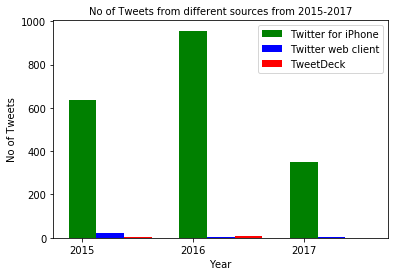

In [494]:
#graph showing no. of tweets from different sources 
twitter_for_iphone = [634, 956, 352]
twitter_web_client = [20, 4, 3]
tweetdeck = [4, 7, 0]
label = [2015, 2016, 2017  ]

X= np.arange(3)
plt.bar(X+0.00, twitter_for_iphone, color= 'g', width= 0.25, label = 'Twitter for iPhone')
plt.bar(X+0.25, twitter_web_client, color= 'b', width= 0.25, label = 'Twitter web client')
plt.bar(X+0.50, tweetdeck, color= 'r', width= 0.25, label= 'TweetDeck')
plt.xticks(X, label, fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('No of Tweets', fontsize=10)
plt.title('No of Tweets from different sources from 2015-2017', fontsize= 10)
plt.legend()
plt.show()



In [505]:
#analysis about rating numerator and denominator 
twitter_vis2= twitter_final_copy[['tweet_id', 'jpg_url','rating_numerator', 'rating_denominator']]
twitter_vis2.head()
twitter_vis2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 4 columns):
tweet_id              1980 non-null object
jpg_url               1980 non-null object
rating_numerator      1979 non-null float64
rating_denominator    1979 non-null float64
dtypes: float64(2), object(2)
memory usage: 77.3+ KB


In [496]:
twitter_final_copy[twitter_final_copy['rating_numerator']==1776]


,tweet_id,date,time,source,jpg_url,text,name,dog_stage,rating_numerator,rating_denominator,...,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
722,749981277374128128,2016-07-04,15:00:45,TweetDeck,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,None,1776.0,10.0,...,5493,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


In [497]:
twitter_vis2[twitter_vis2['rating_numerator'] == 1776].jpg_url

722    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [498]:
#dog with 0 rating_numerator
twitter_final_copy[twitter_final_copy['rating_numerator']== 0].text

233    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
752    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

In [499]:
twitter_vis3= twitter_final_copy[['tweet_id', 'favorite_count', 'retweet_count']]

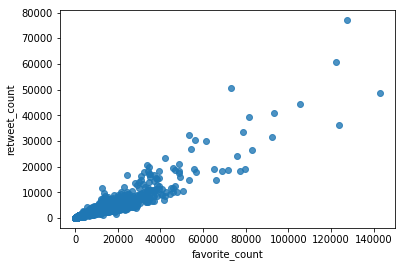

In [500]:
#correlation between favorite and retweet counts 
sns.regplot(x= twitter_vis3['favorite_count'], y= twitter_vis3['retweet_count'], 
            fit_reg=False)

In [501]:
twitter_vis3['favorite_count'].corr(twitter_vis3['retweet_count'])

0.917062112633663

In [502]:
#explore about the dog with max fav counts
twitter_final_copy[twitter_final_copy['favorite_count'] == 142784]

,tweet_id,date,time,source,jpg_url,text,name,dog_stage,rating_numerator,rating_denominator,...,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
307,822872901745569793,2017-01-21,18:26:02,Twitter for iPhone,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,puppo,13.0,10.0,...,142784,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True


In [503]:
#explore about dog with max retweets 
twitter_final_copy[twitter_final_copy['retweet_count'] == 76971]

,tweet_id,date,time,source,jpg_url,text,name,dog_stage,rating_numerator,rating_denominator,...,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
771,744234799360020481,2016-06-18,18:26:18,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,doggo,13.0,10.0,...,127728,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True


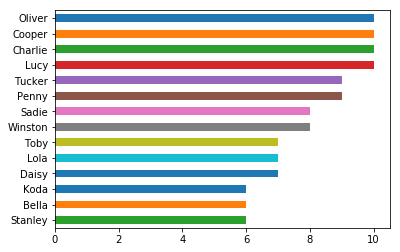

In [504]:
#most common dog names
twitter_final_copy['name'].value_counts()[1:15].plot('barh').invert_yaxis()